In [1]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
from pyspark.sql import SparkSession
if 'spark' in locals():
    spark.stop()

In [3]:
spark=SparkSession.builder.appName('Varun').getOrCreate()

In [4]:
dat=[1,2,3,4,5]

In [16]:
spark

In [17]:
#rdd creation
rdd=spark.sparkContext.parallelize(dat)

In [6]:
fd=rdd.filter(lambda x:x%2==0)

In [7]:
rdd.collect()

[1, 2, 3, 4, 5]

In [4]:
#dataframe creation
data = [
    (1, "Alice", 25),
    (2, "Bob", 30),
    (3, "Cathy", 28)
]

columns = ["ID", "Name", "Age"]

df = spark.createDataFrame(data, schema=columns)

df.show()


+---+-----+---+
| ID| Name|Age|
+---+-----+---+
|  1|Alice| 25|
|  2|  Bob| 30|
|  3|Cathy| 28|
+---+-----+---+



In [ ]:
spark.stop()

In [17]:
df_2=spark.read.csv("C:/Users/acer/Downloads/data.tsv",sep='\t', header=True, inferSchema=True)

In [18]:
df_2.show()

+--------+----------+-----+------+---------+-----+
|deviceid|customerid|price|alerts| location|state|
+--------+----------+-----+------+---------+-----+
|       1|        11|  100|    14|Bengaluru|   KA|
|       2|        22|  200|    25|   Mysuru|   KA|
|       3|        33|  300|     6|       AP| NULL|
|       4|        44|  ten|     7|  Chennai|   TN|
|       5|      NULL|  250|     8| Hubballi|   KA|
|       6|        66|  600|     9|    Bidar|   KA|
|       7|        77| NULL|     7|  Belgavi|   KA|
+--------+----------+-----+------+---------+-----+



In [19]:
df_2.printSchema()

root
 |-- deviceid: integer (nullable = true)
 |-- customerid: integer (nullable = true)
 |-- price: string (nullable = true)
 |-- alerts: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- state: string (nullable = true)



In [20]:
#renaming columns
df_2 = df_2.withColumnRenamed('deviceid', 'Device Id').withColumnRenamed('customerid', 'Customer Id').withColumnRenamed('price', 'Price').withColumnRenamed('alerts', 'Alerts').withColumnRenamed('location', 'Location').withColumnRenamed('state', 'State')

In [21]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  200|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  ten|     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77| NULL|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [22]:
#printing a message if the dataset contain nan
from pyspark.sql.functions import col, sum

null_counts = df_2.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_2.columns]).collect()[0]
null_counts

Row(Device Id=0, Customer Id=1, Price=1, Alerts=0, Location=0, State=1)

In [23]:
if any(null_counts):
    print("The Dataset contains NULL values")
else:
    print("The Dataset does not contain NULL values")

The dataset contains NULL values


In [24]:
#column with number of nan
df_2.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_2.columns]).show()

+---------+-----------+-----+------+--------+-----+
|Device Id|Customer Id|Price|Alerts|Location|State|
+---------+-----------+-----+------+--------+-----+
|        0|          1|    1|     0|       0|    1|
+---------+-----------+-----+------+--------+-----+



In [26]:
df_2=df_2.replace({'ten':'','200':''})
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|     |    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|     |     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77| NULL|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [27]:
df_2= df_2.withColumn("Price", col("Price").cast("float"))

In [32]:
#filling missing value by mean price
price_mean = df_2.select(mean("Price")).collect()[0][0]

In [34]:
price_mean

312.5

In [38]:
df_2 = df_2.fillna({"Price": price_mean})
df_2 = df_2.withColumn("Price", col("Price").cast("int"))

In [39]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  312|     7|  Chennai|   TN|
|        5|       NULL|  250|     8| Hubballi|   KA|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [43]:
#drop row with nan in the subset
df_2=df_2.na.drop(how='any',subset=['Device Id','Customer Id'])

In [44]:
df_2.show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        3|         33|  300|     6|       AP| NULL|
|        4|         44|  312|     7|  Chennai|   TN|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [46]:
#total price of all  device
df_2.select(sum('Price')).show()

+----------+
|sum(Price)|
+----------+
|      1936|
+----------+



In [49]:
#displayig dataset ignore nan rows
df_2[df_2['State'].isNotNull()].show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
|        4|         44|  312|     7|  Chennai|   TN|
|        6|         66|  600|     9|    Bidar|   KA|
|        7|         77|  312|     7|  Belgavi|   KA|
+---------+-----------+-----+------+---------+-----+



In [51]:
#total number of alerts per state 
df_2.groupby('State').agg(sum('Alerts')).show()

+-----+-----------+
|State|sum(Alerts)|
+-----+-----------+
| NULL|          6|
|   TN|          7|
|   KA|         55|
+-----+-----------+



In [52]:
x=df_2.select(mean('Alerts')).collect()[0][0]

In [55]:
#printing alerts greather than their mean
x
df_2[df_2['Alerts']>x].show()

+---------+-----------+-----+------+---------+-----+
|Device Id|Customer Id|Price|Alerts| Location|State|
+---------+-----------+-----+------+---------+-----+
|        1|         11|  100|    14|Bengaluru|   KA|
|        2|         22|  312|    25|   Mysuru|   KA|
+---------+-----------+-----+------+---------+-----+



#Assessment-1 MOvies Dataset

In [4]:
from pyspark.sql.functions import current_timestamp
import random
import datetime

data = []
num_records = 100 

for _ in range(num_records):
    movie_id = random.randint(1, 50)  
    user_id = random.randint(1, 100)  
    rating = round(random.uniform(1, 6), 1) 
    timestamp = datetime.datetime.now() - datetime.timedelta(days=random.randint(0, 30))  
    
    data.append((movie_id, user_id, rating, timestamp))


columns = ['MovieID', 'UserID', 'Rating', 'Timestamp']
df = spark.createDataFrame(data, columns)

df.show(5)

+-------+------+------+--------------------+
|MovieID|UserID|Rating|           Timestamp|
+-------+------+------+--------------------+
|     47|    41|   5.9|2024-12-10 16:36:...|
|     32|    64|   2.1|2024-11-27 16:36:...|
|      3|    77|   1.1|2024-12-18 16:36:...|
|     47|    44|   2.4|2024-12-09 16:36:...|
|     16|    45|   1.4|2024-12-01 16:36:...|
+-------+------+------+--------------------+
only showing top 5 rows



In [5]:
df.printSchema()

root
 |-- MovieID: long (nullable = true)
 |-- UserID: long (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Timestamp: timestamp (nullable = true)



In [6]:
#converting date to dd-mm-yyyy format
from pyspark.sql.functions import *
df2 = df.withColumn("New_Timestamp", date_format("Timestamp", "dd-MM-yyyy HH:mm:ss"))

In [7]:
df2.show()

+-------+------+------+--------------------+-------------------+
|MovieID|UserID|Rating|           Timestamp|      New_Timestamp|
+-------+------+------+--------------------+-------------------+
|     47|    41|   5.9|2024-12-10 16:36:...|10-12-2024 16:36:18|
|     32|    64|   2.1|2024-11-27 16:36:...|27-11-2024 16:36:18|
|      3|    77|   1.1|2024-12-18 16:36:...|18-12-2024 16:36:18|
|     47|    44|   2.4|2024-12-09 16:36:...|09-12-2024 16:36:18|
|     16|    45|   1.4|2024-12-01 16:36:...|01-12-2024 16:36:18|
|     14|    54|   3.1|2024-11-22 16:36:...|22-11-2024 16:36:18|
|      7|    68|   1.5|2024-12-12 16:36:...|12-12-2024 16:36:18|
|     24|    41|   2.6|2024-12-05 16:36:...|05-12-2024 16:36:18|
|     21|    59|   4.5|2024-12-02 16:36:...|02-12-2024 16:36:18|
|     17|    34|   1.4|2024-12-11 16:36:...|11-12-2024 16:36:18|
|     30|    34|   5.0|2024-11-30 16:36:...|30-11-2024 16:36:18|
|     27|    56|   1.1|2024-11-27 16:36:...|27-11-2024 16:36:18|
|     13|    58|   5.1|20

In [8]:
#avg rating per movie 
df2.groupby('MovieID').agg(avg('Rating')).show()

+-------+------------------+
|MovieID|       avg(Rating)|
+-------+------------------+
|     22|              4.25|
|      7|               3.6|
|     32|3.8499999999999996|
|     25|3.7000000000000006|
|     27|             3.625|
|     17|               3.4|
|     41|3.1333333333333333|
|      1|2.9000000000000004|
|      3|               2.5|
|     13|              4.15|
|     18|              4.16|
|     14|               3.8|
|     21|             3.025|
|     38| 4.466666666666666|
|     30|               3.6|
|     20|               2.3|
|     16|3.5999999999999996|
|     47|               3.0|
|     24|3.6500000000000004|
|     29| 4.966666666666667|
+-------+------------------+
only showing top 20 rows



In [10]:
#user who rated more than 2 movies
rating_count = df2.groupBy('UserID').agg(count('MovieID').alias('RatingCount'))

users_2ratings = rating_count.filter(rating_count['RatingCount'] > 3)

users_2ratings.show()

+------+-----------+
|UserID|RatingCount|
+------+-----------+
|    34|          4|
|    68|          4|
|    11|          4|
+------+-----------+



In [12]:
df2.show()

+-------+------+------+--------------------+-------------------+
|MovieID|UserID|Rating|           Timestamp|      New_Timestamp|
+-------+------+------+--------------------+-------------------+
|     37|    97|   1.2|2024-11-24 12:31:...|24-11-2024 12:31:41|
|     29|    72|   3.2|2024-12-06 12:31:...|06-12-2024 12:31:41|
|      7|    48|   1.1|2024-12-12 12:31:...|12-12-2024 12:31:41|
|     23|    21|   3.7|2024-12-01 12:31:...|01-12-2024 12:31:41|
|      9|    35|   3.0|2024-12-05 12:31:...|05-12-2024 12:31:41|
|     50|    22|   3.0|2024-12-02 12:31:...|02-12-2024 12:31:41|
|     45|    28|   1.5|2024-12-16 12:31:...|16-12-2024 12:31:41|
|     50|    98|   4.5|2024-11-23 12:31:...|23-11-2024 12:31:41|
|     50|    64|   1.7|2024-11-19 12:31:...|19-11-2024 12:31:41|
|     32|    56|   4.3|2024-12-06 12:31:...|06-12-2024 12:31:41|
|     19|    84|   1.5|2024-12-14 12:31:...|14-12-2024 12:31:41|
|     27|    79|   2.9|2024-12-11 12:31:...|11-12-2024 12:31:41|
|      7|    89|   2.5|20

In [11]:
#top 5 moies with with highest rating
avg_ratings = df2.groupBy('MovieID').agg(avg('Rating').alias('AverageRating'))

avg_ratings.orderBy('AverageRating', ascending=False).limit(5).show()

+-------+-----------------+
|MovieID|    AverageRating|
+-------+-----------------+
|      4|              5.4|
|     12|              5.3|
|     29|4.966666666666667|
|     42|4.949999999999999|
|     44|              4.8|
+-------+-----------------+



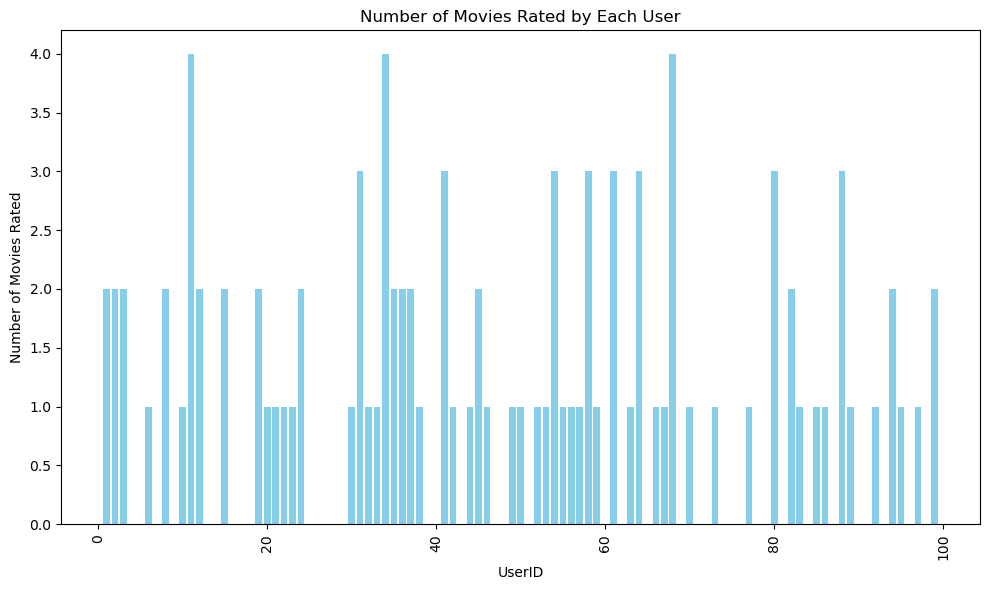

In [12]:
#ploting the number of movies rated by each user
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import count


rating_count = df2.groupBy('UserID').agg(count('MovieID').alias('RatingCount'))

df3 = rating_count.toPandas()

plt.figure(figsize=(10,6))
plt.bar(df3['UserID'], df3['RatingCount'], color='skyblue')
plt.xlabel('UserID')
plt.ylabel('Number of Movies Rated')
plt.title('Number of Movies Rated by Each User')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [4]:
#Analysing trip data
from pyspark.sql import SparkSession
import random
import datetime

data = []

for _ in range(100):
    trip_id = random.randint(1, 50)
    start_time = datetime.datetime.now() - datetime.timedelta(hours=random.randint(1, 24))
    end_time = start_time + datetime.timedelta(minutes=random.randint(5, 120))
    distance = round(random.uniform(1, 5), 2) 
    fare = round(distance * random.uniform(5, 15), 2)
    
    data.append((trip_id, start_time, end_time, distance, fare))

In [5]:
#Load the dataset into a PySpark DataFrame.
columns = ['TripID', 'StartTime', 'EndTime', 'Distance', 'Fare']
df_trip = spark.createDataFrame(data, schema=columns)
df_trip.show(5)

+------+--------------------+--------------------+--------+-----+
|TripID|           StartTime|             EndTime|Distance| Fare|
+------+--------------------+--------------------+--------+-----+
|    31|2024-12-20 13:40:...|2024-12-20 15:08:...|    3.77|33.47|
|    39|2024-12-20 05:40:...|2024-12-20 05:45:...|    4.83|65.88|
|    43|2024-12-19 16:40:...|2024-12-19 17:18:...|    3.26|41.62|
|    31|2024-12-20 05:40:...|2024-12-20 07:36:...|    3.42|49.43|
|    24|2024-12-19 20:40:...|2024-12-19 20:48:...|    2.43|16.86|
+------+--------------------+--------------------+--------+-----+
only showing top 5 rows



In [6]:
#trip duration for each trip.
from pyspark.sql.functions import unix_timestamp,col
#df_trip=df_trip.withColumn('Duration',df_trip['EndTime']-df_trip['StartTime'])
df_trip = df_trip.withColumn("Duration", (unix_timestamp(col("EndTime")) - unix_timestamp(col("StartTime")))/60)

In [7]:
df_trip.show()

+------+--------------------+--------------------+--------+-----+--------+
|TripID|           StartTime|             EndTime|Distance| Fare|Duration|
+------+--------------------+--------------------+--------+-----+--------+
|    31|2024-12-20 13:40:...|2024-12-20 15:08:...|    3.77|33.47|    88.0|
|    39|2024-12-20 05:40:...|2024-12-20 05:45:...|    4.83|65.88|     5.0|
|    43|2024-12-19 16:40:...|2024-12-19 17:18:...|    3.26|41.62|    38.0|
|    31|2024-12-20 05:40:...|2024-12-20 07:36:...|    3.42|49.43|   116.0|
|    24|2024-12-19 20:40:...|2024-12-19 20:48:...|    2.43|16.86|     8.0|
|    33|2024-12-20 14:40:...|2024-12-20 16:24:...|    3.86|32.85|   104.0|
|     7|2024-12-20 08:40:...|2024-12-20 10:05:...|    3.49|41.63|    85.0|
|    14|2024-12-20 03:40:...|2024-12-20 04:07:...|    3.41|29.01|    27.0|
|    37|2024-12-19 21:40:...|2024-12-19 22:26:...|    1.34|17.39|    46.0|
|    12|2024-12-20 08:40:...|2024-12-20 10:08:...|    3.52|49.26|    88.0|
|    34|2024-12-20 09:40:

In [8]:
#the average fare per mile.
df_trip.withColumn("FarePerMile", col("Fare") / col("Distance")).agg({'FarePerMile':'avg'}).collect()[0][0]

10.323833829277808

In [10]:
df_trip = df_trip.withColumn("FarePerMile", col("Fare") / col("Distance"))

average_fare_per_mile = df_trip.agg({"FarePerMile": "avg"}).collect()[0][0]

print(f"Average fare per mile: {average_fare_per_mile}")

Average fare per mile: 10.323833829277808


In [11]:
#the top 3 longest trips (based on distance)
df_trip.orderBy('Duration', ascending=False).limit(3).show()

+------+--------------------+--------------------+--------+-----+--------+------------------+
|TripID|           StartTime|             EndTime|Distance| Fare|Duration|       FarePerMile|
+------+--------------------+--------------------+--------+-----+--------+------------------+
|    43|2024-12-20 04:40:...|2024-12-20 06:40:...|    1.12|13.26|   120.0|11.839285714285714|
|    15|2024-12-19 16:40:...|2024-12-19 18:39:...|    1.47| 19.1|   119.0|12.993197278911566|
|    23|2024-12-19 22:40:...|2024-12-20 00:39:...|     3.7|38.04|   119.0| 10.28108108108108|
+------+--------------------+--------------------+--------+-----+--------+------------------+



In [12]:
#Grouping trips by hours and total number of trips per hour.
from pyspark.sql.functions import hour,count

hr=df_trip.withColumn('Hour',hour("StartTime"))
hr_trip = hr.groupBy("Hour").agg(count("*").alias("TotalTrips"))

hr_trip.orderBy("Hour").show()

+----+----------+
|Hour|TotalTrips|
+----+----------+
|   0|         4|
|   1|         2|
|   2|         3|
|   3|         4|
|   4|         4|
|   5|        10|
|   6|         4|
|   7|         4|
|   8|         6|
|   9|         3|
|  11|         1|
|  12|         4|
|  13|         3|
|  14|         4|
|  15|         3|
|  16|         6|
|  17|         5|
|  18|         4|
|  19|         2|
|  20|         9|
+----+----------+
only showing top 20 rows



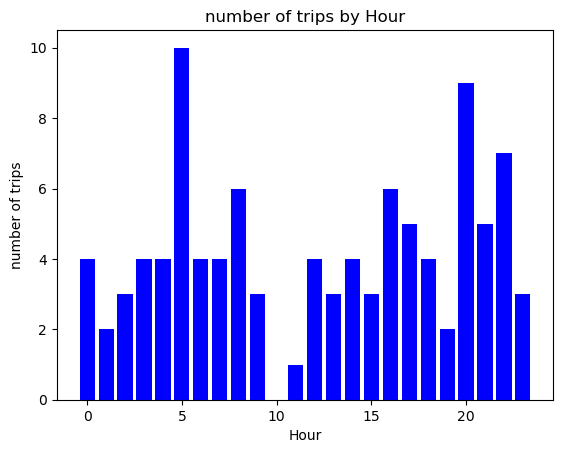

In [14]:
import  matplotlib.pyplot as plt
hr = hr_trip.toPandas()
plt.bar(hr["Hour"], hr["TotalTrips"], color='blue')
plt.xlabel("Hour")
plt.ylabel("number of trips")
plt.title("number of trips by Hour")
plt.show()